In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob

In [2]:
climate_path = "/Users/dgagne/gd/Lorenz GAN docs/exp_u_chey/gan_climate/02000000/"
#climate_path = "../exp_climate_gan/"
climate_files = sorted(glob(climate_path + "*.nc"))
climate_gan_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_gan_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [4]:
climate_gan_x[0].shape

(2000000, 8)

In [3]:
climate_path = "/Users/dgagne/gd/Lorenz GAN docs/exp_u_chey/poly_climate/02000000/"
#climate_path = "../exp_climate_poly/"
climate_files = sorted(glob(climate_path + "*.nc"))
climate_poly_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_poly_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [8]:
lorenz_data = xr.open_dataset("/Users/dgagne/gd/Lorenz GAN docs/exp_u_chey/lorenz_output.nc")
start_index = 2000000
step_values = lorenz_data["step"].values

l_start = np.where(step_values == start_index)[0][0]
l_end = l_start + 2000000
x_vals = lorenz_data["lorenz_x"].values[l_start:l_end]
#y_vals = lorenz_data["lorenz_y"].values
lorenz_data.close()


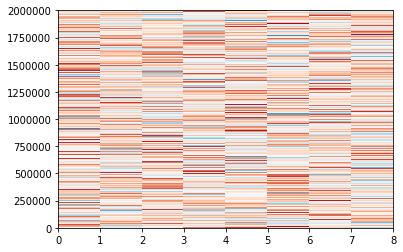

In [9]:
plt.pcolormesh(climate_gan_x[0], vmin=-30, vmax=30, cmap="RdBu_r")

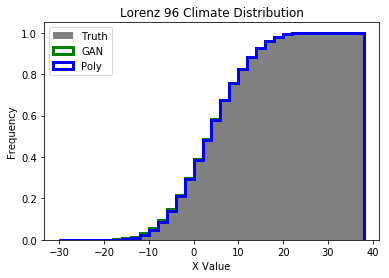

In [16]:
plt.figure(figsize=(6, 4))
c_bins = np.arange(-30, 40, 2)
plt.hist(x_vals.ravel(), bins=c_bins, color="gray", label="Truth", normed=True, cumulative=True)
plt.hist(climate_gan_x[0].ravel(), bins=c_bins, histtype="step", color="green", lw=3, label="GAN", normed=True, cumulative=True)
plt.hist(climate_poly_x[0].ravel(), bins=c_bins, histtype="step", color="blue", lw=3, label="Poly", normed=True, cumulative=True)
#plt.gca().set_yscale("log")
plt.ylabel("Frequency")
plt.xlabel("X Value")
plt.title("Lorenz 96 Climate Distribution")
plt.legend()

In [12]:
2000000 * 0.005

10000.0